# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
# setting path

path = r'/Users/brad/Desktop/Instacart Basket Analysis'

In [6]:
# Importing the orders_products_customers_merged pkl file

merged = pd.read_pickle(os.path.join(path, '/Users/brad/Desktop/Instacart Basket Analysis/02 Data/Prepared Data/orders_products_customers_merge.pkl'))
print(path)

/Users/brad/Desktop/Instacart Basket Analysis


In [7]:
merged.head()

,Unnamed: 0.1,Unnamed: 0_x,order_id,user_id,eval_set,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,...,order_frequency_flag,first_name,surname,gender,state,age,date_joined,dependants,marital_status,income
0,0,0,2539329,1,prior,1,2,8,NaN,196,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,1,1,2398795,1,prior,2,3,7,15.0,196,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,2,2,473747,1,prior,3,3,12,21.0,196,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,3,3,2254736,1,prior,4,4,7,29.0,196,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,4,4,431534,1,prior,5,4,15,28.0,196,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


# Q3. You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.


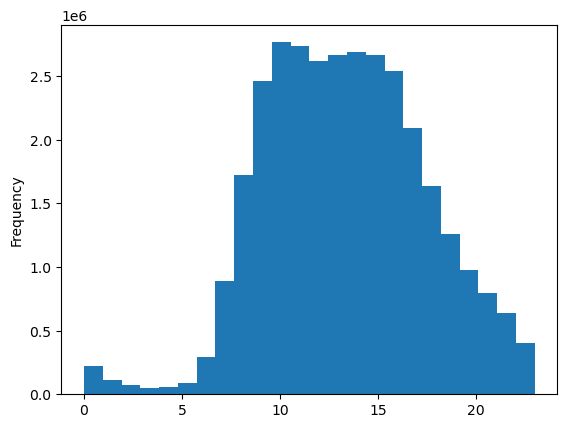

In [8]:
hist_order_hour_of_day = merged['order_hour_of_day'].plot.hist(bins = 24)

In a markdown cell beneath your histogram, describe what the histogram demonstrates

The histogram above demonstrates the busiest hours of the day for customers to place orders. It is apparent that orders are more frequent during working daylight hours (9Am- 5pm), with very little before then, and a gradual tapering from 5pm onwards. 

In [9]:
#exporting histogram
hist_order_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis',  'Visualizations', 'hist_order_hour_of_day.png'))

# Q4 -The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

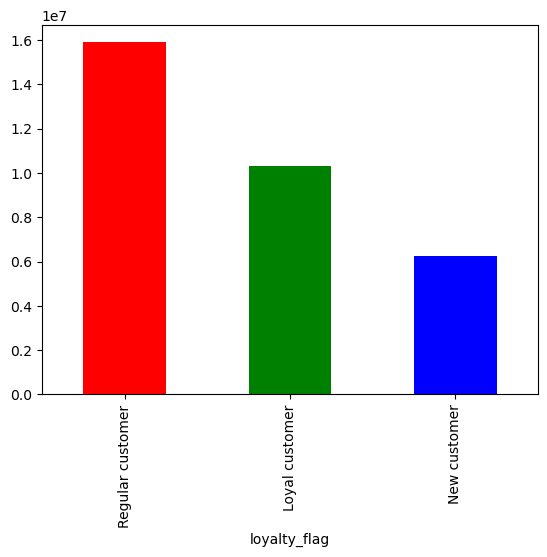

In [10]:
bar_loyalty_flag = merged['loyalty_flag'].value_counts().plot.bar(color = ['red', 'green', 'blue'])

In [11]:
# exporting bar graph
bar_loyalty_flag.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_flag.png'))

# Q5 -Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [12]:
# create a sample from a list of random floating numbers 
np.random.seed(4)
dev = np.random.rand(len(merged)) <= 0.7

In [13]:
dev

array([False,  True, False, ..., False,  True,  True])

In [14]:
# splitting the merged dataframe into big and small variables
big = merged[dev]
small = merged[~dev]

In [15]:
# checking the size of merged df
len(merged)

32434212

In [16]:
# confirming the size of big + small
len(big) + len(small)

32434212

In [17]:
# manipulating the samples of merged df
merged_2 = small[['order_hour_of_day', 'prices']]

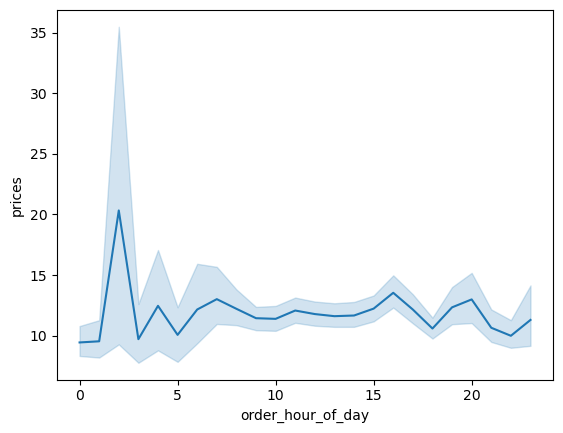

In [18]:
# create the line graph
line_hour_of_day = sns.lineplot(data = merged_2, x = 'order_hour_of_day', y = 'prices')

In [19]:
# exporting line_hour_of_day line graph
line_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_hour_of_day.png'))

# Q6 - Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:

In [21]:
merged_3 = small[['age', 'dependants']]

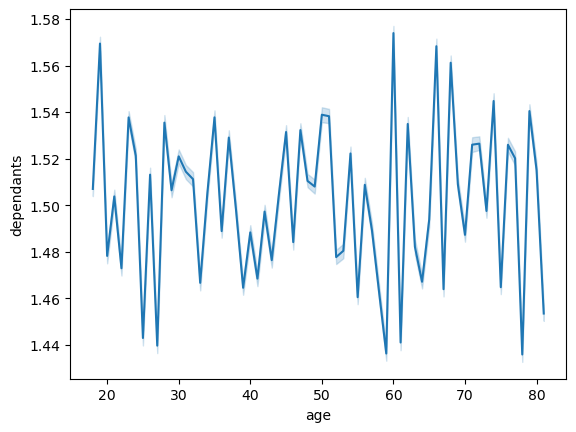

In [22]:
line_age_dependents = sns.lineplot(data = merged, x = 'age', y = 'dependants')

Describe what the line chart shows.

Pattern is erratic indicating there is no correlation. 

# Q7 - You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.

In [23]:
merged_4 = small[['age', 'income']]

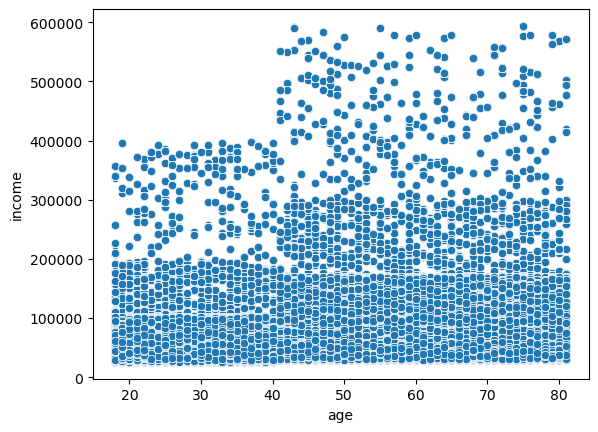

In [24]:
scatterplot_age_income = sns.scatterplot(x = 'age', y = 'income', data = merged_4)

describe what the scatterplot shows.

The older people get, the higher their income. 

In [25]:
# exporting scatterplot_age_income
scatterplot_age_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_age_income.png'))